###Challenge 1

Open up a new IPython notebook
Download a few MTA turnstile data files
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [1]:
from __future__ import division
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline

In [3]:
with open('turnstile_150704.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))
print "Challenge 1:", raw_readings.items()[0]

Challenge 1: (('A030', 'R083', '01-06-00', '23 ST-5 AVE'), [('NR', 'BMT', '06/27/2015', '00:00:00', 'REGULAR', '0005953341', '0003310763'), ('NR', 'BMT', '06/27/2015', '04:00:00', 'REGULAR', '0005953422', '0003310780'), ('NR', 'BMT', '06/27/2015', '08:00:00', 'REGULAR', '0005953447', '0003310808'), ('NR', 'BMT', '06/27/2015', '12:00:00', 'REGULAR', '0005953536', '0003310957'), ('NR', 'BMT', '06/27/2015', '16:00:00', 'REGULAR', '0005953814', '0003311230'), ('NR', 'BMT', '06/27/2015', '20:00:00', 'REGULAR', '0005954213', '0003311487'), ('NR', 'BMT', '06/28/2015', '00:00:00', 'REGULAR', '0005954420', '0003311555'), ('NR', 'BMT', '06/28/2015', '04:00:00', 'REGULAR', '0005954483', '0003311567'), ('NR', 'BMT', '06/28/2015', '08:00:00', 'REGULAR', '0005954499', '0003311581'), ('NR', 'BMT', '06/28/2015', '12:00:00', 'REGULAR', '0005954576', '0003311720'), ('NR', 'BMT', '06/28/2015', '16:00:00', 'REGULAR', '0005954831', '0003312037'), ('NR', 'BMT', '06/28/2015', '20:00:00', 'REGULAR', '00059551

###Challenge 2

Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [7]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}
print "Challenge 2", datetime_counts.items()[0]

Challenge 2 (('A030', 'R083', '01-06-00', '23 ST-5 AVE'), [(datetime.datetime(2015, 6, 27, 0, 0), 81), (datetime.datetime(2015, 6, 27, 4, 0), 25), (datetime.datetime(2015, 6, 27, 8, 0), 89), (datetime.datetime(2015, 6, 27, 12, 0), 278), (datetime.datetime(2015, 6, 27, 16, 0), 399), (datetime.datetime(2015, 6, 27, 20, 0), 207), (datetime.datetime(2015, 6, 28, 0, 0), 63), (datetime.datetime(2015, 6, 28, 4, 0), 16), (datetime.datetime(2015, 6, 28, 8, 0), 77), (datetime.datetime(2015, 6, 28, 12, 0), 255), (datetime.datetime(2015, 6, 28, 16, 0), 313), (datetime.datetime(2015, 6, 28, 20, 0), 168), (datetime.datetime(2015, 6, 29, 0, 0), 27), (datetime.datetime(2015, 6, 29, 4, 0), 112), (datetime.datetime(2015, 6, 29, 8, 0), 392), (datetime.datetime(2015, 6, 29, 12, 0), 338), (datetime.datetime(2015, 6, 29, 16, 0), 1012), (datetime.datetime(2015, 6, 29, 20, 0), 337), (datetime.datetime(2015, 6, 30, 0, 0), 28), (datetime.datetime(2015, 6, 30, 4, 0), 117), (datetime.datetime(2015, 6, 30, 8, 0), 

###Challenge 3

These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [8]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())
print day_counts.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'), [(datetime.date(2015, 6, 27), 1079), (datetime.date(2015, 6, 28), 892), (datetime.date(2015, 6, 29), 2218), (datetime.date(2015, 6, 30), 2543), (datetime.date(2015, 7, 1), 2500), (datetime.date(2015, 7, 2), 2095), (datetime.date(2015, 7, 3), 731)])


###Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:
```
%matplotlib inline
```
This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with
```
import matplotlib.pyplot as plt
```
Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:
```
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
```

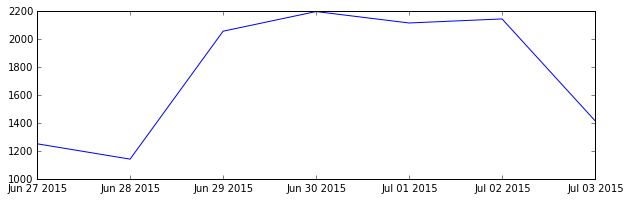

In [15]:
for turnstile, values in day_counts.items():
    dates = [date for date, count in values]
    counts = [count for date, count in values]
plt.figure(figsize = (10,3))
plt.plot(dates, counts)
plt.show()

###Challenge 5

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [16]:
#(By CA/Unit/Station)
group_all_counts = {}
keymap = {turnstile: tuple((turnstile[0], turnstile[1], turnstile[3])) for turnstile, rows in day_counts.items()}
for turnstile, rows in day_counts.items():
    group_all_counts.setdefault(tuple(keymap[turnstile]), []).append(tuple(rows))

group_day_counts = {}
for station, data in group_all_counts.items():
    new_dict = {}
    for week in data:
            for day, count in week:
                new_dict[day] = new_dict.get(day, 0) + count
            group_day_counts[station] = sorted(new_dict.items())
#print group_day_counts.items()[0]

#(By just the station name)
station_all_counts = {}
station_keymap = {turnstile: turnstile[2] for turnstile, rows in group_day_counts.items()}
for turnstile, rows in group_day_counts.items():
    station_all_counts.setdefault(station_keymap[turnstile], []).append(tuple(rows))

station_day_counts = {}
for station, data in station_all_counts.items():
    station_new_dict = {}
    for week in data:
            for day, count in week:
                station_new_dict[day] = station_new_dict.get(day, 0) + count
            station_day_counts[station] = sorted(station_new_dict.items())
print station_day_counts.items()[0]

('BOYD-88 ST', [(datetime.date(2015, 6, 27), 2692), (datetime.date(2015, 6, 28), 2263), (datetime.date(2015, 6, 29), 5538), (datetime.date(2015, 6, 30), 5688), (datetime.date(2015, 7, 1), 5746), (datetime.date(2015, 7, 2), 5643), (datetime.date(2015, 7, 3), 3422)])


###Challenge 6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [27]:
for station, total_counts in station_day_counts.items():
    station_dates = [date for date, count in total_counts]
    station_counts = [count for date, count in total_counts]

###Challenge 7

Plot the time series for a station.

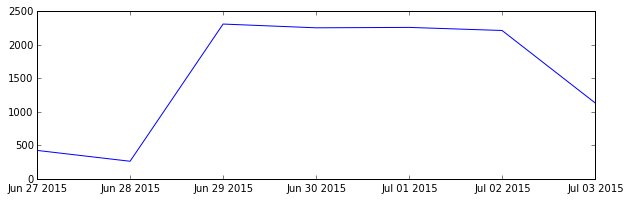

In [30]:
plt.figure(figsize = (10,3))
plt.plot(station_dates, station_counts)
plt.show()

###Challenge 8

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. ```plt.plot(week_count_list)``` for every ```week_count_list``` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

###Challenge 9

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [31]:
total_ridership_counts = {}
for station, date_counts in station_day_counts.items():
    for day, count in date_counts:
        total_ridership_counts[station] = total_ridership_counts.get(station, 0) + count

top_stations = OrderedDict(sorted(total_ridership_counts.items(), key=lambda tup: tup[-1], reverse = True)[0:10])
print top_stations

OrderedDict([('34 ST-PENN STA', 1010725), ('42 ST-GRD CNTRL', 826071), ('34 ST-HERALD SQ', 686365), ('14 ST-UNION SQ', 645491), ('86 ST', 621707), ('42 ST-TIMES SQ', 603601), ('42 ST-PA BUS TE', 567004), ('CANAL ST', 454307), ('125 ST', 436317), ('96 ST', 435014)])


###Challenge 10

Make a single list of these total ridership values and plot it with
```
plt.hist(total_ridership_counts)
```
to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint:*

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do
```
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)
```

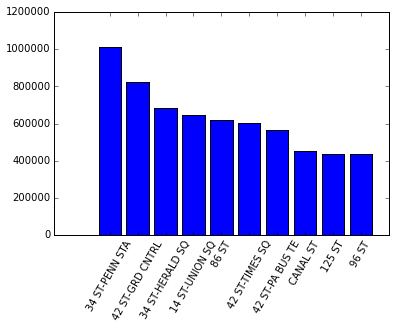

In [34]:
plt.bar(range(len(top_stations)), top_stations.values(), align='center')
plt.xticks(range(len(top_stations)), top_stations.keys(), rotation=60)
plt.show()